##### EDA on customer profile and insurance policy premium

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
# reading csv claimdata_utf8
# check number of observations and features
lar_loss = pd.read_csv('new_claimdata.csv', low_memory=False)
lar_loss.shape

(518077, 73)

In [3]:
def datetime(new_feature,feature,year,month,date):
    lar_loss[new_feature] = pd.to_datetime(lar_loss[feature])
    lar_loss[year] = lar_loss[new_feature].dt.year
    lar_loss[month] = lar_loss[new_feature].dt.month
    lar_loss[date] = lar_loss[new_feature].dt.day
    return lar_loss[year].head()

In [4]:
datetime('Event_Occurrence','Event_Occurrence_Month','Event_Occurrence_year','Event_Occurrence_month','Event_Occurrence_date')
datetime('Inception','Inception_Month','Inception_year', 'Inception_month','Inception_date')
datetime('Issued','Issued_Date','Issued_year','Issued_month','Issued_date')
datetime('Effective','Effective_Date','Effective_year','Effective_month','Effective_date')

0    2010
1    2010
2    2010
3    2010
4    2010
Name: Effective_year, dtype: int64

In [5]:
columns = list(lar_loss.columns)
feature_lst = ['EV_LARGE','Insured_Age_Range','Event_Occurrence','Event_Occurrence_Month',
              'Inception','Inception_Month','Issued','Issued_Date','Effective','Effective_Date',
              'Event_Number','Claim_Number']
features_to_use = [col for col in columns if col not in feature_lst]
#features_to_use

In [6]:
X = lar_loss[features_to_use]
y = lar_loss['EV_LARGE']

In [7]:
feature_lst = ['Event_Occurrence','Event_Occurrence_Month',
              'Inception','Inception_Month','Issued','Issued_Date','Effective','Effective_Date',
              'Event_Number','Claim_Number']

In [8]:
features_to_use = [col for col in columns if col not in feature_lst]


In [9]:
large_loss = lar_loss[features_to_use]

In [10]:
new = large_loss.loc[large_loss['EV_LARGE'] == 1]

In [11]:
new.to_csv('large_claimdata.csv',index = False)

In [12]:
new['EV_LARGE'].value_counts()

1    51226
Name: EV_LARGE, dtype: int64

In [13]:
new['Insured_Age'].min(axis = 0)

17

In [14]:
new['Insured_Age'].max(axis = 0)

89

In [15]:
bin_values = np.arange(start=10, stop=100, step=10)
bin_values

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

### Distribution of Age

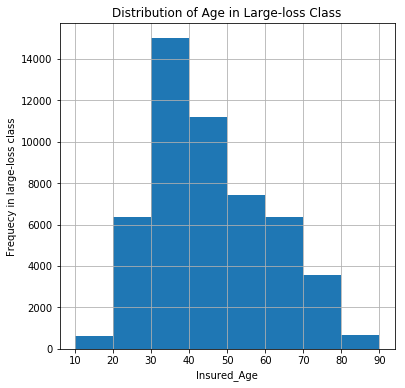

In [16]:
# wn_carrier = data[data['unique_carrier'] == 'WN']
new['Insured_Age'].hist(bins=bin_values, figsize=[6,6])
plt.title('Distribution of Age in Large-loss Class')
plt.xlabel('Insured_Age')
plt.ylabel('Frequecy in large-loss class')
plt.show()


In [17]:
len(new)

51226

In [18]:
product1 = new[(new['Insured_Age'] >= 30) & (new['Insured_Age'] <= 50)]

In [19]:
len(product1)

27101

In [20]:
product1 = new[(new['Insured_Age'] >= 30) & (new['Insured_Age'] <= 50)]

### Significant Policy
- Annual_Premium_BIL 

In [21]:
features_to_use = ['Annual_Premium','Annual_Premium_BIL','Annual_Premium_PDL','Annual_Premium_PPA','Annual_Premium_PI','Annual_Premium_OD',
                   'Annual_Premium_ODPE','Annual_Premium_PE','LE_Coverage','PI_Coverage','FB_Coverage','OD_Coverage',
                   'PPA_Coverage']

In [22]:
product1 = product1[features_to_use]

In [23]:
product1['LE_Coverage'].value_counts()

0    19043
1     8058
Name: LE_Coverage, dtype: int64

In [24]:
product1['PI_Coverage'].value_counts()

1    23088
0     4013
Name: PI_Coverage, dtype: int64

In [25]:
product1['FB_Coverage'].value_counts()

0    24849
1     2252
Name: FB_Coverage, dtype: int64

In [26]:
product1['OD_Coverage'].value_counts()

1    20988
0     6113
Name: OD_Coverage, dtype: int64

In [27]:
product1['PPA_Coverage'].value_counts()

1    25710
0     1391
Name: PPA_Coverage, dtype: int64

In [28]:
product1['Annual_Premium_PDL'].min()

4497

In [29]:
product1['Annual_Premium_PDL'].max()

162312

In [30]:
bin_values = np.arange(start=4000, stop=170000, step=1000)
bin_values

array([  4000,   5000,   6000,   7000,   8000,   9000,  10000,  11000,
        12000,  13000,  14000,  15000,  16000,  17000,  18000,  19000,
        20000,  21000,  22000,  23000,  24000,  25000,  26000,  27000,
        28000,  29000,  30000,  31000,  32000,  33000,  34000,  35000,
        36000,  37000,  38000,  39000,  40000,  41000,  42000,  43000,
        44000,  45000,  46000,  47000,  48000,  49000,  50000,  51000,
        52000,  53000,  54000,  55000,  56000,  57000,  58000,  59000,
        60000,  61000,  62000,  63000,  64000,  65000,  66000,  67000,
        68000,  69000,  70000,  71000,  72000,  73000,  74000,  75000,
        76000,  77000,  78000,  79000,  80000,  81000,  82000,  83000,
        84000,  85000,  86000,  87000,  88000,  89000,  90000,  91000,
        92000,  93000,  94000,  95000,  96000,  97000,  98000,  99000,
       100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000,
       108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000,
      

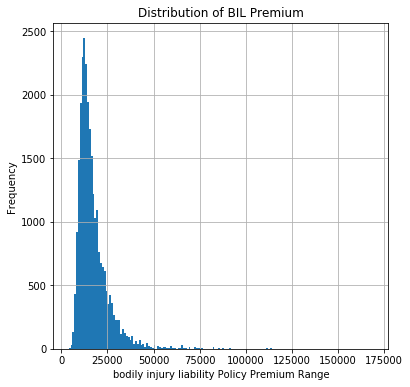

In [31]:
# wn_carrier = data[data['unique_carrier'] == 'WN']
product1['Annual_Premium_PDL'].hist(bins=bin_values, figsize=[6,6])
plt.title('Distribution of BIL Premium')
plt.xlabel('bodily injury liability Policy Premium Range')
plt.ylabel('Frequency')
plt.show()

In [32]:
product2 = product1[(product1['Annual_Premium_PDL'] >= 10000) & (product1['Annual_Premium_PDL'] <= 30000)]

In [33]:
product2['Annual_Premium_PDL'].min()

10000

In [34]:
product2['Annual_Premium_PDL'].max()

29985

In [35]:
product2['Annual_Premium_PDL'].mean()

16359.579080025205

In [36]:
bin_values = np.arange(start = 10000, stop=30000, step=100)
bin_values

array([10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800,
       10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700,
       11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600,
       12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500,
       13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400,
       14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300,
       15400, 15500, 15600, 15700, 15800, 15900, 16000, 16100, 16200,
       16300, 16400, 16500, 16600, 16700, 16800, 16900, 17000, 17100,
       17200, 17300, 17400, 17500, 17600, 17700, 17800, 17900, 18000,
       18100, 18200, 18300, 18400, 18500, 18600, 18700, 18800, 18900,
       19000, 19100, 19200, 19300, 19400, 19500, 19600, 19700, 19800,
       19900, 20000, 20100, 20200, 20300, 20400, 20500, 20600, 20700,
       20800, 20900, 21000, 21100, 21200, 21300, 21400, 21500, 21600,
       21700, 21800, 21900, 22000, 22100, 22200, 22300, 22400, 22500,
       22600, 22700,

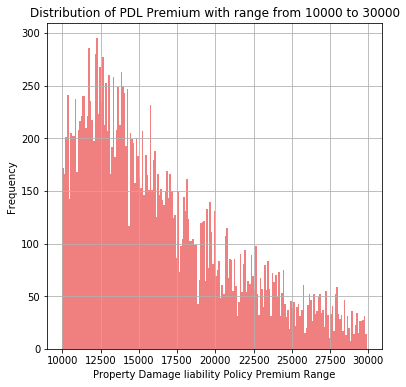

In [37]:
# wn_carrier = data[data['unique_carrier'] == 'WN']
product2['Annual_Premium_PDL'].hist(bins=bin_values, figsize=[6,6],facecolor='lightcoral')
plt.title('Distribution of PDL Premium with range from 10000 to 30000')
plt.xlabel('Property Damage liability Policy Premium Range')
plt.ylabel('Frequency')
plt.show()
